# **Visualizing adversarial success rates**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [9]:
def process_paths(measurement_case, create_dir=True,
                  base_result_path = "../../results/",
                  base_doc_path = "../../doc/"):
    """
        Calculates and creates (if needed) paths for visualizing.
        Parameters:
            - measurement_case: measurement name (directory in results directory)
            - create_dir: creates directory in doc folder if True and the target plot directory does not exist
    """
    meas_path = base_result_path + measurement_case + "/"
    plot_path = base_doc_path + measurement_case + "/"
    
    if (create_dir) and (not(os.path.isdir(plot_path))):
        os.mkdir(plot_path)
    return meas_path, plot_path

## Raw measurements

Plotting accuracy per digit per participants

In [20]:
def plot_raw_accuracies(meas_case):
    measurement_path, plot_save_path = process_paths(meas_case)
    acc_data = pd.read_csv(measurement_path+"adv_results.csv")
    plt.figure(figsize=[16, 10])
    sns.boxplot(x = "digit", y="accuracy", hue="name", data=acc_data,
               hue_order=["client%d"%i for i in range(10)])

### IID without sharing

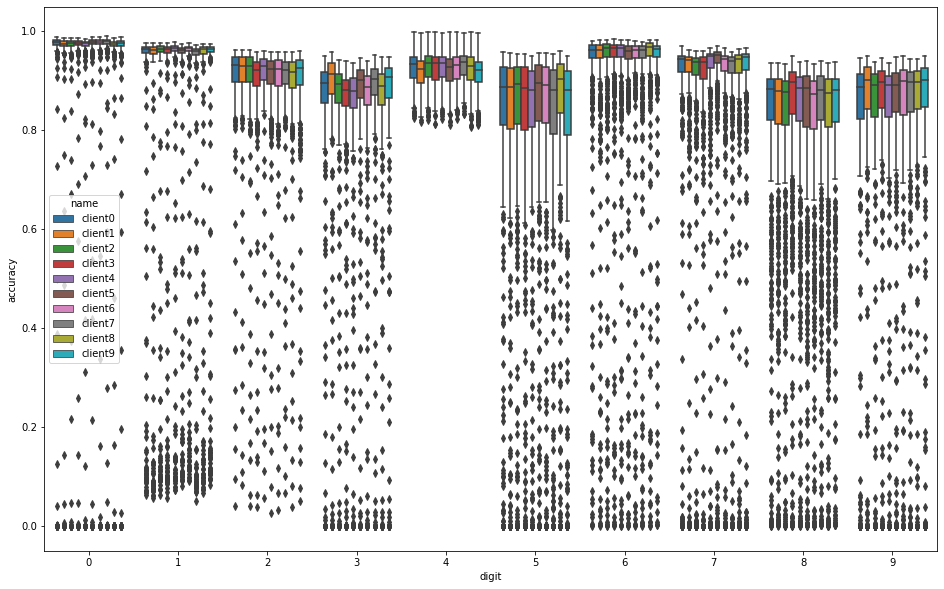

In [21]:
plot_raw_accuracies("fed_iid")

### NONIID50 without sharing

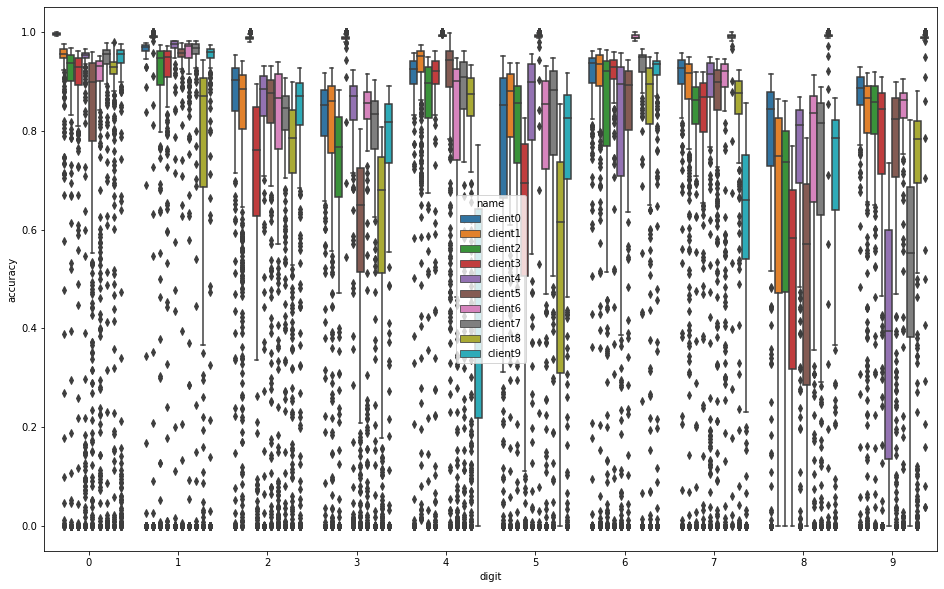

In [22]:
plot_raw_accuracies("fed_noshare")

### Sharing minimal fix amount

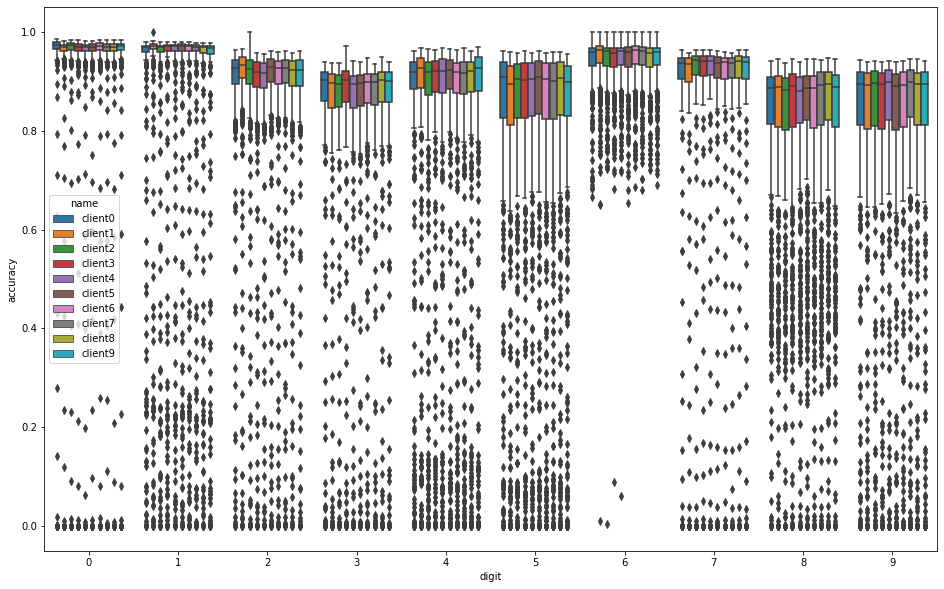

In [23]:
plot_raw_accuracies("fed_fixshare")

## Processed values

In [24]:
measurements = ["fed_iid", "fed_noshare", "fed_fixshare"]

In [48]:
for meas in measurements:
    measurement_path, plot_save_path = process_paths(meas)
    acc_data = pd.read_csv(measurement_path+"adv_results.csv")
    acc_data = acc_data[acc_data["name"] !=  "global"]
    accuracy = 0
    for digit in range(10):
        digit_data = acc_data[acc_data["digit"] == digit]
        grouped_digit = digit_data.groupby("name").mean("accuracy")
        best_client = grouped_digit["accuracy"].idxmax()
        print(digit, best_client)
        if "client%d"%digit == best_client:
            accuracy+=1
    print("------------\n%s:\t\t%.4f\n\n"%(meas, accuracy/10))

0 client7
1 client6
2 client4
3 client1
4 client7
5 client8
6 client9
7 client5
8 client3
9 client9
------------
fed_iid:		0.1000


0 client0
1 client1
2 client2
3 client3
4 client4
5 client5
6 client6
7 client7
8 client8
9 client9
------------
fed_noshare:		1.0000


0 client0
1 client1
2 client1
3 client3
4 client1
5 client5
6 client6
7 client2
8 client8
9 client7
------------
fed_fixshare:		0.6000


